Assignment 2 - Classification

In [1]:
# import Pkg; Pkg.add("MLJ")
# import Pkg; Pkg.add("DataFrames")
# import Pkg; Pkg.add("Tables")
# import Pkg; Pkg.add("CategoricalArrays")
using MLJ, CSV, DataFrames, Tables, CategoricalArrays
df_train = CSV.read("mitbih_train.csv", DataFrame, header=0)
df_test = CSV.read("mitbih_test.csv", DataFrame, header=0)
df = vcat(df_train,df_test)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.0857843
2,0.960114,0.863248,0.461538,0.196581,0.0940171,0.125356,0.0997151,0.0883191
3,1.0,0.659459,0.186486,0.0702703,0.0702703,0.0594595,0.0567568,0.0432432
4,0.925414,0.665746,0.541436,0.276243,0.196133,0.0773481,0.0718232,0.0607735
5,0.967136,1.0,0.830986,0.586854,0.356808,0.248826,0.14554,0.0892019
6,0.927461,1.0,0.626943,0.193437,0.0949914,0.0725389,0.0431779,0.0535406
7,0.423611,0.791667,1.0,0.256944,0.0,0.277778,0.465278,0.520833
8,0.716814,0.539823,0.283186,0.129794,0.0648968,0.0766962,0.0265487,0.0324484
9,0.874214,0.849057,0.480084,0.0587002,0.0901468,0.310273,0.387841,0.385744


Extract equal number of samples by class in training dataset to balance the data

In [34]:
# import Pkg; Pkg.add("StatsBase")
using StatsBase

#extract all data by class
df_train_0 = df_train[df_train[:,188] .== 0.0, :]
df_train_1 = df_train[df_train[:,188] .== 1.0, :]
df_train_2 = df_train[df_train[:,188] .== 2.0, :]
df_train_3 = df_train[df_train[:,188] .== 3.0, :]
df_train_4 = df_train[df_train[:,188] .== 4.0, :]

#extract sample data by class and retrieve index
sample_train_0_index= sample(1:nrow(df_train_0), 10000)
sample_train_1_index = sample(1:nrow(df_train_1), 10000)
sample_train_2_index = sample(1:nrow(df_train_2), 10000)
sample_train_3_index = sample(1:nrow(df_train_3), 10000)
sample_train_4_index = sample(1:nrow(df_train_4), 10000)

#create downsampled dataframe by class 
df_sample_train_0 = df_train_0[sample_train_0_index,:]
df_sample_train_1 = df_train_1[sample_train_1_index,:]
df_sample_train_2 = df_train_2[sample_train_2_index,:]
df_sample_train_3 = df_train_3[sample_train_3_index,:]
df_sample_train_4 = df_train_4[sample_train_4_index,:]

#concatenate all downsampled classes into one dataframe
df_sample_train = vcat(df_sample_train_0, df_sample_train_1 ,df_sample_train_2, df_sample_train_3, df_sample_train_4)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.89916,0.487395,0.162465,0.0840336,0.070028,0.0588235
2,1.0,0.886973,0.329502,0.00383142,0.172414,0.262452,0.250958
3,0.00480769,0.0576923,0.432692,0.774038,0.610577,0.447115,0.365385
4,0.931298,0.554707,0.0,0.0101781,0.0305344,0.043257,0.0127226
5,1.0,0.878542,0.12753,0.0283401,0.0283401,0.0587045,0.107287
6,0.972906,0.928571,0.753695,0.300493,0.0665025,0.12069,0.0763547
7,1.0,0.996678,0.511628,0.0299003,0.0,0.0598007,0.076412
8,1.0,0.896648,0.656425,0.418994,0.223464,0.153631,0.131285
9,0.875236,0.913043,0.400756,0.0699433,0.0604915,0.0151229,0.00756144


Extract equal number of samples by class in test dataset

In [35]:
#extract all data by class
df_test_0 = df_test[df_test[:,188] .== 0.0, :]
df_test_1 = df_test[df_test[:,188] .== 1.0, :]
df_test_2 = df_test[df_test[:,188] .== 2.0, :]
df_test_3 = df_test[df_test[:,188] .== 3.0, :]
df_test_4 = df_test[df_test[:,188] .== 4.0, :]

# #extract sample data by class and retrieve index
# sample_test_0_index= sample(1:nrow(df_test_0), 1000)
# sample_test_1_index = sample(1:nrow(df_test_1), 1000)
# sample_test_2_index = sample(1:nrow(df_test_2), 1000)
# sample_test_3_index = sample(1:nrow(df_test_3), 1000)
# sample_test_4_index = sample(1:nrow(df_test_4), 1000)

# #create downsampled dataframe by class 
# df_sample_test_0 = df_test_0[sample_test_0_index,:]
# df_sample_test_1 = df_test_1[sample_test_1_index,:]
# df_sample_test_2 = df_test_2[sample_test_2_index,:]
# df_sample_test_3 = df_test_3[sample_test_3_index,:]
# df_sample_test_4 = df_test_4[sample_test_4_index,:]

#concatenate all classes into one dataframe
df_test = vcat(df_test_0, df_test_1 ,df_test_2, df_test_3, df_test_4)

#concatenate sample train and test data into one dataframe
df_sample = vcat(df_sample_train, df_test)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.89916,0.487395,0.162465,0.0840336,0.070028,0.0588235
2,1.0,0.886973,0.329502,0.00383142,0.172414,0.262452,0.250958
3,0.00480769,0.0576923,0.432692,0.774038,0.610577,0.447115,0.365385
4,0.931298,0.554707,0.0,0.0101781,0.0305344,0.043257,0.0127226
5,1.0,0.878542,0.12753,0.0283401,0.0283401,0.0587045,0.107287
6,0.972906,0.928571,0.753695,0.300493,0.0665025,0.12069,0.0763547
7,1.0,0.996678,0.511628,0.0299003,0.0,0.0598007,0.076412
8,1.0,0.896648,0.656425,0.418994,0.223464,0.153631,0.131285
9,0.875236,0.913043,0.400756,0.0699433,0.0604915,0.0151229,0.00756144


Training dataset is now balanced with equal number of samples per class

In [36]:
sample_count_train = combine(groupby(df_sample_train, [188]), nrow => :count)

,Column188,count
,Float64,Int64
1,0.0,10000
2,1.0,10000
3,2.0,10000
4,3.0,10000
5,4.0,10000


In [37]:
sample_count_test = combine(groupby(df_test, [188]), nrow => :count)

,Column188,count
,Float64,Int64
1,0.0,18118
2,1.0,556
3,2.0,1448
4,3.0,162
5,4.0,1608


Unpack data

In [38]:
y, X = unpack(df_sample, ==(:Column188))
X1 = Tables.columntable(X)
y = categorical(y)

71892-element CategoricalArray{Float64,1,UInt32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0

### KNN

In [8]:
# import Pkg; Pkg.add("NearestNeighborModels")
using NearestNeighborModels

Wrap parameters in a model and create a machine using the model and data

In [39]:
knn = KNNClassifier(K=5)
mach_knn = machine(knn, X1, y)

untrained Machine; caches model-specific representations of data
  model: KNNClassifier(K = 5, …)
  args: 
    1:	Source @599 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @939 ⏎ AbstractVector{Multiclass{5}}


Fit and evaluate the performance of the model using a 10-fold cross-validation

In [40]:
eval_knn=evaluate!(mach_knn, rows=1:50000, resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601
Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:02:01

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:01:46

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:01:30

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:01:15

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:01:00

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:45

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:30

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:15

Evaluating over 10 folds: 100%[=========================] Time: 0:02:29


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.963       │ 0.00161 │ [0.963, 0.964, 0.965, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


Use the trained model to predict the test data and measure the accuracy

In [11]:
test_results=Dict(); # create a dict to collect all the test results from the various models
yhat = predict_mode(mach_knn, rows=50001:71892)
test_results["acc_knn"] =accuracy(yhat, y[50001:71892])

0.8115750045678787

Generate the confusion matrix

In [41]:
ConfusionMatrix()(yhat, y[50001:71892])

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0, 3.0, 4.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


5×5 Matrix{Int64}:
 13134  117   100   19    89
  1929  391    44    1    15
  1345   25  1183    6    66
  1159   15    91  134     7
   551    8    30    2  1431

Plot out an accuracy run-chart for classifiers using different k's between 1 to 5.  

┌ Info: Training machine(KNNClassifier(K = 1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 2, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 3, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 4, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 5, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


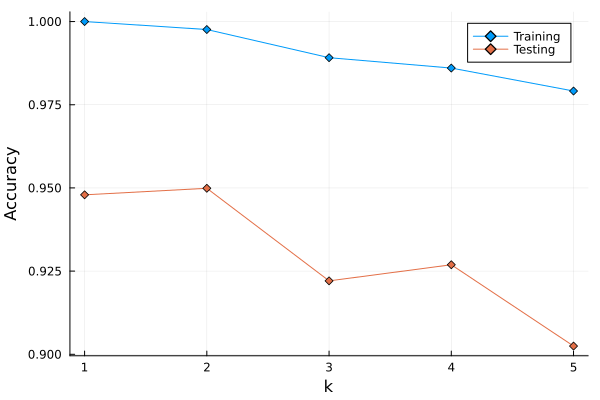

In [42]:
# import Pkg; Pkg.add("Plots")
using Plots
train=[]
test=[]
for i in 1:5
    knnc = KNNClassifier(K=i)
    knnc_mach = machine(knnc, X1, y) 
    MLJ.fit!(knnc_mach, rows=1:50000)
    tr_acc = accuracy(MLJ.predict_mode(knnc_mach, rows=1:50000), y[1:50000])
    te_acc = accuracy(MLJ.predict_mode(knnc_mach, rows=50001:71892), y[50001:71892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:5,train,xlab="k",ylab="Accuracy", marker=:d, label="Training")
plot!(1:5,test,xlab="k",ylab="Accuracy", marker=:d, label="Testing")

Using the distance-weighted voting scheme for kNN

┌ Info: Training machine(KNNClassifier(K = 1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 2, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496
┌ Info: Training machine(KNNClassifier(K = 3, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 4, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 5, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


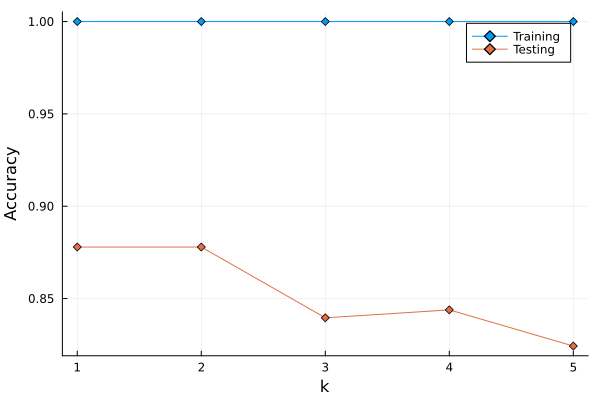

In [16]:
train=[]
test=[]
for i in 1:5
    knnc = KNNClassifier(K=i,weights = Inverse())
    knnc_mach = machine(knnc, X1, y) 
    MLJ.fit!(knnc_mach, rows=1:50000)
    tr_acc = accuracy(MLJ.predict_mode(knnc_mach, rows=1:50000), y[1:50000])
    te_acc = accuracy(MLJ.predict_mode(knnc_mach, rows=50001:71892), y[50001:71892])
    push!(train, tr_acc)
    push!(test, te_acc)
end
plot(1:5,train,xlab="k",ylab="Accuracy", marker=:d, label="Training")
plot!(1:5,test,xlab="k",ylab="Accuracy", marker=:d, label="Testing")

Not much improvement based on above plot...

### Decision Tree

In [43]:
Tree = @load DecisionTreeClassifier pkg=DecisionTree
tree = Tree()

import MLJDecisionTreeInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


DecisionTreeClassifier(
  max_depth = -1, 
  min_samples_leaf = 1, 
  min_samples_split = 2, 
  min_purity_increase = 0.0, 
  n_subfeatures = 0, 
  post_prune = false, 
  merge_purity_threshold = 1.0, 
  display_depth = 5, 
  feature_importance = :impurity, 
  rng = Random._GLOBAL_RNG())

In [44]:
using Random
Random.seed!(1234);
mach_tree = machine(tree, X1, y)

untrained Machine; caches model-specific representations of data
  model: DecisionTreeClassifier(max_depth = -1, …)
  args: 
    1:	Source @156 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @515 ⏎ AbstractVector{Multiclass{5}}


In [45]:
eval_tree=evaluate!(mach_tree,rows=1:50000, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:01:03

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:00:55

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:00:47

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:00:39

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:00:32

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:24

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:16

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:08

Evaluating over 10 folds: 100%[=========================] Time: 0:01:20


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.975       │ 0.00217 │ [0.976, 0.975, 0.972, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [46]:
yhat = predict_mode(mach_tree, rows=50001:71892)
test_results["acc_tree"] = accuracy(yhat, y[50001:71892])

0.9023844326694683

In [47]:
ConfusionMatrix()(yhat, y[50001:71892]) # Generate the Confusion Matrix

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0, 3.0, 4.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


5×5 Matrix{Int64}:
 16365  102    78   29    37
   772  434    14    2     9
   550   15  1302   14    23
   198    2    32  116     1
   233    3    22    1  1538

In [48]:
report(mach_tree).print_tree() # Print the decision tree

Feature 97 < 0.0006588 ?
├─ Feature 18 < 0.2074 ?
    ├─ Feature 4 < 0.1686 ?
        ├─ Feature 88 < 0.001139 ?
            ├─ Feature 63 < 0.1015 ?
                ├─ 
                └─ 
            └─ Feature 72 < 0.1302 ?
                ├─ 
                └─ 
        └─ Feature 8 < 0.249 ?
            ├─ Feature 2 < 0.6756 ?
                ├─ 
                └─ 
            └─ Feature 5 < 0.9166 ?
                ├─ 
                └─ 
    └─ Feature 2 < 0.1019 ?
        ├─ Feature 6 < 0.4095 ?
            ├─ Feature 27 < 0.2076 ?
                ├─ 1 : 1/1
                └─ 3 : 464/464
            └─ Feature 27 < 0.7323 ?
                ├─ 
                └─ 
        └─ Feature 3 < 0.3604 ?
            ├─ Feature 76 < 0.002494 ?
                ├─ 
                └─ 
            └─ Feature 4 < 0.2382 ?
                ├─ 
                └─ 
└─ Feature 4 < 0.2259 ?
    ├─ Feature 1 < 0.78 ?
        ├─ Feature 25 < 0.4139 ?
            ├─ Feature 6 < 0.02239 ?
           

Plot out a run-chart for both training and testing accuracies with max_depth ranged from 1 to 10  

┌ Info: Training machine(DecisionTreeClassifier(max_depth = 1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 2, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 3, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 4, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 5, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 6, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 7, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 8, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 9, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 10, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 11, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 12, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 13, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 14, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 15, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 16, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 17, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 18, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 19, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


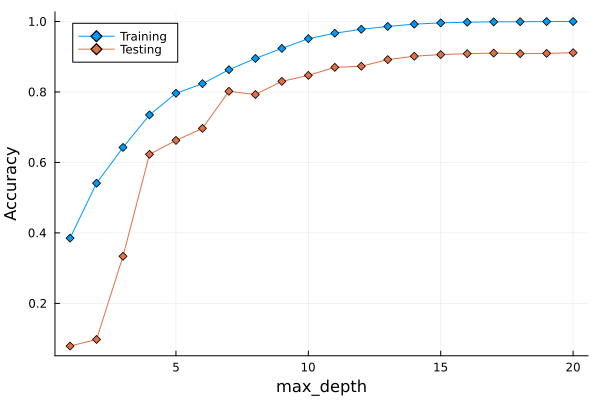

In [50]:
using Plots
train=[]
test=[]
for i in 1:20
    tree = Tree(max_depth=i)
    mach_tree = machine(tree, X1, y)
    fit!(mach_tree, rows=1:50000)
    tr_acc = accuracy(MLJ.predict_mode(mach_tree, rows=1:50000), y[1:50000])
    te_acc = accuracy(MLJ.predict_mode(mach_tree, rows=50001:71892), y[50001:71892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:20,train,xlab="max_depth",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:20,test,xlab="max_depth",ylab="Accuracy", marker=:d, label="Testing")

┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496
┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496
┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496
┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


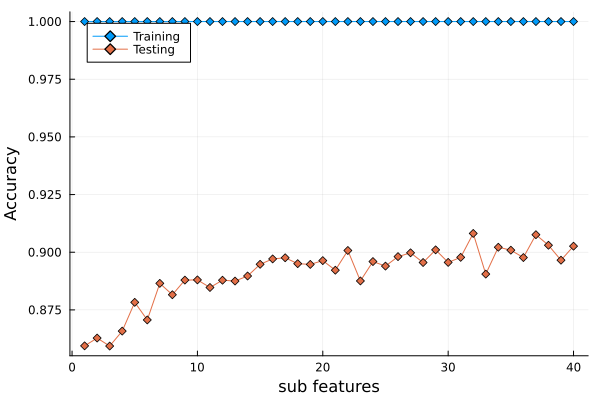

In [54]:
train=[]
test=[]
for i in 1:40
    tree = Tree(n_subfeatures=i)
    mach_tree = machine(tree, X1, y)
    fit!(mach_tree, rows=1:50000)
    tr_acc = accuracy(MLJ.predict_mode(mach_tree, rows=1:50000), y[1:50000])
    te_acc = accuracy(MLJ.predict_mode(mach_tree, rows=50001:71892), y[50001:71892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:40,train,xlab="sub features",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:40,test,xlab="sub features",ylab="Accuracy", marker=:d, label="Testing")

Rerunning the model to use a max depth of 10, and 9 sub-features to see if we get a better accuracy

In [55]:
Random.seed!(1234);
tree.max_depth = 15
tree.n_subfeatures = 32
mach_tree = machine(tree, X1, y)
eval_tree=evaluate!(mach_tree,rows=1:50000, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:00:11

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:00:10

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:00:09

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:00:07

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:00:06

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:05

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:03

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:02

Evaluating over 10 folds: 100%[=========================] Time: 0:00:15


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.964       │ 0.00357 │ [0.966, 0.966, 0.973, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [56]:
yhat = predict_mode(mach_tree, rows=50001:71892)
test_results["acc_tree"] = accuracy(yhat, y[50001:71892])

0.8640599305682441

In [57]:
ConfusionMatrix()(yhat, y[50001:71892]) # Generate the Confusion Matrix

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0, 3.0, 4.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


5×5 Matrix{Int64}:
 15566  112    77   22    40
  1263  414    21    1    14
   572   18  1286   18    19
   392    7    36  121     6
   325    5    28    0  1529

### SVM

In [97]:
# import Pkg; Pkg.add("MLJLIBSVMInterface")
# import Pkg; Pkg.add("LIBSVM")

   Resolving package versions...

  No Changes to `C:\Users\carlo\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\carlo\.julia\environments\v1.8\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\carlo\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\carlo\.julia\environments\v1.8\Manifest.toml`


In [58]:
SVC = @load SVC pkg=LIBSVM

import MLJLIBSVMInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


MLJLIBSVMInterface.SVC

Specify the kernel type and degree

In [59]:
@load SVC pkg=LIBSVM; 
using LIBSVM

svc_model = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(5))

import MLJLIBSVMInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


SVC(
  kernel = LIBSVM.Kernel.Polynomial, 
  gamma = 0.0, 
  cost = 1.0, 
  cachesize = 200.0, 
  degree = 5, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true, 
  probability = false)

In [60]:
mach_svm = machine(svc_model, X1, y)
eval_svm=evaluate!(mach_svm,rows=1:50000, resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:35:21

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:30:10

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:24:42

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:20:57

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:16:57

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:12:32

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:08:14

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:04:06

Evaluating over 10 folds: 100%[=========================] Time: 0:40:43


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬───────────┬─────────────┬─────────┬──────────────────────────────
│ measure    │ operation │ measurement │ 1.96*SE │ per_fold                    ⋯
├────────────┼───────────┼─────────────┼─────────┼──────────────────────────────
│ Accuracy() │ predict   │ 0.898       │ 0.00271 │ [0.899, 0.906, 0.896, 0.892 ⋯
└────────────┴───────────┴─────────────┴─────────┴──────────────────────────────
                                                                1 column omitted


In [61]:
yhat = MLJ.predict(mach_svm, rows=50001:71892)
test_results["acc_svm"] = accuracy(yhat, y[50001:71892])

0.8978622327790974

In [62]:
ConfusionMatrix()(yhat, y[50001:71892])

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0, 3.0, 4.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


5×5 Matrix{Int64}:
 16357  141    63   13   103
   437  395    23    2     2
   427   13  1274    5    12
   730    6    86  142     3
   167    1     2    0  1488

Generate a run chart (accuracy vs. degree) with the polynomial kernel degree varying from 1 to 10

┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


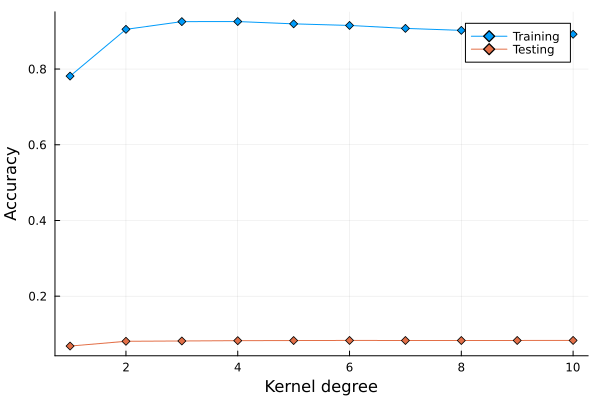

In [63]:
train=[]
test=[]
for i in 1:10
    svcmodel = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(i));
    svcmach = machine(svcmodel, X1, y)
    fit!(svcmach, rows=1:30000)
    tr_acc = accuracy(MLJ.predict(svcmach, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict(svcmach, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:10,train,xlab="Kernel degree",ylab="Accuracy", marker=:d, label="Training")
plot!(1:10,test,xlab="Kernel degree",ylab="Accuracy", marker=:d, label="Testing")

Adding a cost function with the best kernel degree from above

┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


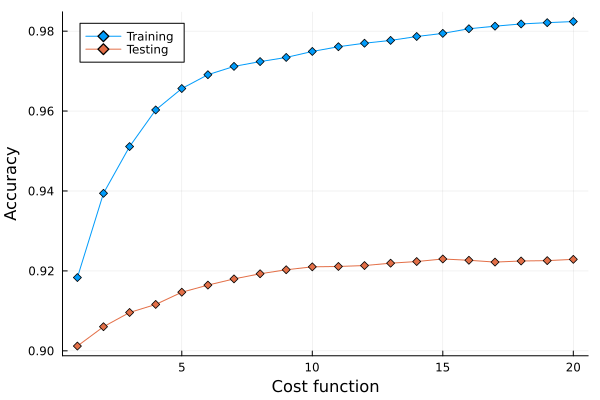

In [80]:
train=[]
test=[]
for i in 1:20
    svcmodel = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(4), cost=Float64(i));
    svcmach = machine(svcmodel, X1, y)
    fit!(svcmach, rows=1:50000)
    tr_acc = accuracy(MLJ.predict(svcmach, rows=1:50000), y[1:50000])
    te_acc = accuracy(MLJ.predict(svcmach, rows=50001:71892), y[50001:71892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:20,train,xlab="Cost function",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:20,test,xlab="Cost function",ylab="Accuracy", marker=:d, label="Testing")

Re-run the model to use the best kernel degree and cost function.

In [82]:
svc_model = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(4), cost=Float64(15));
mach_svm = machine(svc_model, X1, y)
eval_svm=evaluate!(mach_svm,rows=1:50000, resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:19:31

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:16:56

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:14:26

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:12:03

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:09:38

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:07:13

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:04:49

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:02:24

Evaluating over 10 folds: 100%[=========================] Time: 0:24:02


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬───────────┬─────────────┬─────────┬──────────────────────────────
│ measure    │ operation │ measurement │ 1.96*SE │ per_fold                    ⋯
├────────────┼───────────┼─────────────┼─────────┼──────────────────────────────
│ Accuracy() │ predict   │ 0.965       │ 0.00108 │ [0.965, 0.965, 0.965, 0.964 ⋯
└────────────┴───────────┴─────────────┴─────────┴──────────────────────────────
                                                                1 column omitted


In [83]:
yhat = MLJ.predict(mach_svm, rows=50001:71892)
test_results["acc_svm"] = accuracy(yhat, y[50001:71892])

0.9101041476338388

Better accuracy after tuning the parameters...

### Random Forest

In [64]:
using Random
Random.seed!(1234);
RandomForestClassifier = @load RandomForestClassifier pkg="DecisionTree"
rf = RandomForestClassifier()
mach_rf = machine(rf, X1, y)


import MLJDecisionTreeInterface ✔

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


untrained Machine; caches model-specific representations of data
  model: RandomForestClassifier(max_depth = -1, …)
  args: 
    1:	Source @017 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @307 ⏎ AbstractVector{Multiclass{5}}


In [36]:
MLJ.params(rf)

(max_depth = -1,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_purity_increase = 0.0,
 n_subfeatures = -1,
 n_trees = 10,
 sampling_fraction = 0.7,
 feature_importance = :impurity,
 rng = Random._GLOBAL_RNG(),)

In [65]:
eval_rf=evaluate!(mach_rf, rows=1:50000,resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:00:35

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:00:29

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:00:24

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:00:19

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:00:15

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:11

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:07

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:04

Evaluating over 10 folds: 100%[=========================] Time: 0:00:36


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.971       │ 0.00301 │ [0.973, 0.968, 0.972, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [66]:
yhat = predict_mode(mach_rf, rows=50001:71892)
test_results["acc_rf"] = accuracy(yhat, y[50001:71892])

0.9159967111273525

In [67]:
ConfusionMatrix()(yhat, y[50001:71892])

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0, 3.0, 4.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


5×5 Matrix{Int64}:
 16664  118    79   20    47
   665  421    31    0    11
   442   13  1306   15    14
   167    1    21  127     1
   180    3    11    0  1535

Plot accuracy run chart with max depth from 1 to 15

┌ Info: Training machine(RandomForestClassifier(max_depth = 1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 2, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 3, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 4, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 5, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 6, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 7, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 8, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 9, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 10, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 11, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 12, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 13, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 14, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 15, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 16, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 17, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 18, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 19, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


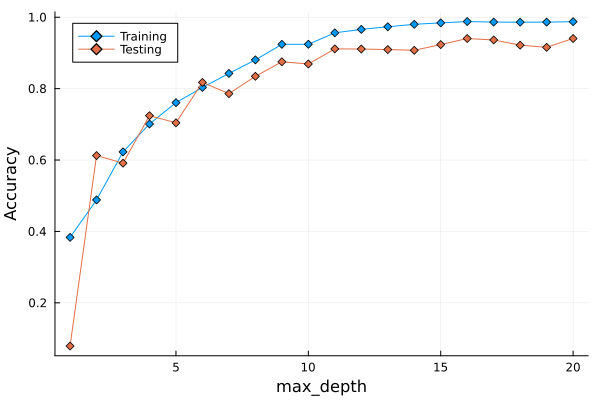

In [68]:
train=[]
test=[]
for i in 1:20
    rf = RandomForestClassifier(max_depth=i)
    mach_rf = machine(rf, X1, y)
    fit!(mach_rf, rows=1:50000)
    tr_acc = accuracy(MLJ.predict_mode(mach_rf, rows=1:50000), y[1:50000])
    te_acc = accuracy(MLJ.predict_mode(mach_rf, rows=50001:71892), y[50001:71892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:20,train,xlab="max_depth",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:20,test,xlab="max_depth",ylab="Accuracy", marker=:d, label="Testing")

Plot accuracy run chart with sub features from 1 to 15

┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


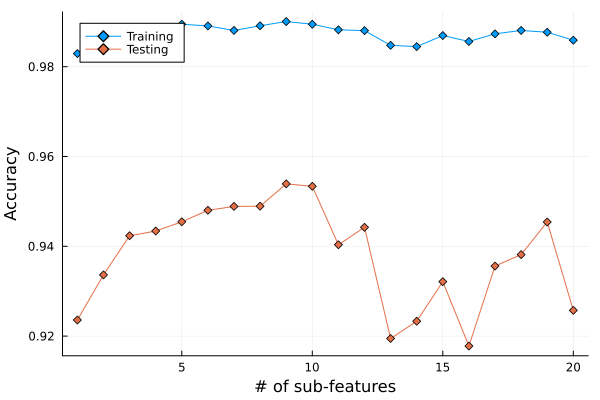

In [69]:
train=[]
test=[]
for i in 1:20
    rf = RandomForestClassifier(max_depth=20, n_subfeatures=i)
    mach_rf = machine(rf, X1, y)
    fit!(mach_rf, rows=1:50000)
    tr_acc = accuracy(MLJ.predict_mode(mach_rf, rows=1:50000), y[1:50000])
    te_acc = accuracy(MLJ.predict_mode(mach_rf, rows=50001:71892), y[50001:71892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:20,train,xlab="# of sub-features",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:20,test,xlab="# of sub-features",ylab="Accuracy", marker=:d, label="Testing")

Plot accuracy run chart with increasing number of trees

┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


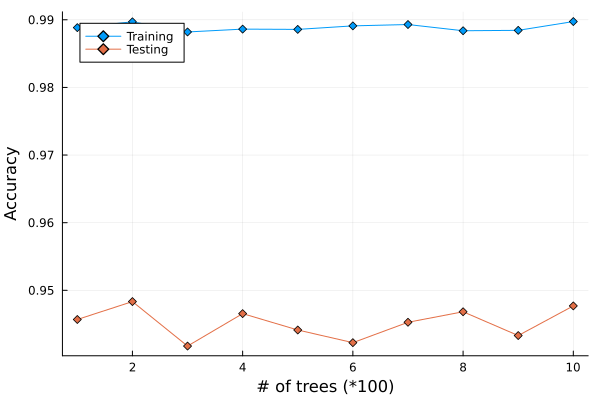

In [71]:
train=[]
test=[]
for i=100:100:1000
    rf = RandomForestClassifier(max_depth=20, n_subfeatures=9, n_trees=i)
    mach_rf = machine(rf, X1, y)
    fit!(mach_rf, rows=1:50000)
    tr_acc = accuracy(MLJ.predict_mode(mach_rf, rows=1:50000), y[1:50000])
    te_acc = accuracy(MLJ.predict_mode(mach_rf, rows=50001:71892), y[50001:71892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:10,train,xlab="# of trees (*100)",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:10,test,xlab="# of trees (*100)",ylab="Accuracy", marker=:d, label="Testing")

Re-run model with best max depth, sub-features and number of trees

In [72]:
rf = RandomForestClassifier(max_depth=20, n_subfeatures=9, n_trees=200)
mach_rf = machine(rf, X1, y)
eval_rf=evaluate!(mach_rf, rows=1:50000,resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:05:41

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:05:01

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:04:20

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:03:36

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:02:54

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:02:11

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:01:28

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:44

Evaluating over 10 folds: 100%[=========================] Time: 0:07:18


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.976       │ 0.00117 │ [0.978, 0.976, 0.978, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [73]:
yhat = predict_mode(mach_rf, rows=50001:71892)
test_results["acc_rf"] = accuracy(yhat, y[50001:71892])

0.9449113831536634

Accuracy has slightly improved... check Confusion Matrix

In [74]:
ConfusionMatrix()(yhat, y[50001:71892])

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0, 3.0, 4.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


5×5 Matrix{Int64}:
 17244  106    72   20    44
   410  437    11    0     4
   268    9  1332   18    11
   123    2    20  124     0
    73    2    13    0  1549

In [51]:
# train=[]
# test=[]
# for i=0.1:0.1:0.9
#     rf = RandomForestClassifier(max_depth=14, n_subfeatures=7, n_trees=900, sampling_fraction=i)
#     mach_rf = machine(rf, X1, y)
#     fit!(mach_rf, rows=1:10000)
#     tr_acc = accuracy(MLJ.predict_mode(mach_rf, rows=1:10000), y[1:10000])
#     te_acc = accuracy(MLJ.predict_mode(mach_rf, rows=10001:15000), y[10001:15000])
#     push!(train, tr_acc)
#     push!(test, te_acc)
# end

# plot(1:10,train,xlab="Sampling fraction",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
# plot!(1:10,test,xlab="Sampling fraction",ylab="Accuracy", marker=:d, label="Testing")

### Linear Discriminant Analysis (LDA)

In [75]:
Random.seed!(1234);
model_lda=@load LDA
lda = model_lda()
mach_lda=machine(lda, X, y)

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


import MLJMultivariateStatsInterface

 ✔


untrained Machine; caches model-specific representations of data
  model: LDA(method = gevd, …)
  args: 
    1:	Source @816 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @199 ⏎ AbstractVector{Multiclass{5}}


In [76]:
eval_lda = evaluate!(mach_lda, rows=1:50000, resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:00:19

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:00:12

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:00:08

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:00:06

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:00:04

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:03

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:02

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:01

Evaluating over 10 folds: 100%[=========================] Time: 0:00:07


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.764       │ 0.00341 │ [0.776, 0.765, 0.76, 0.7 ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [77]:
yhat = predict_mode(mach_lda, rows=50001:71892)
test_results["acc_lda"] = accuracy(yhat, y[50001:71892])

0.7007582678604056

Collect all the accuracy calculated in the cross-validation and create a visualization presenting the average and standard deviations of the 10 results for each model

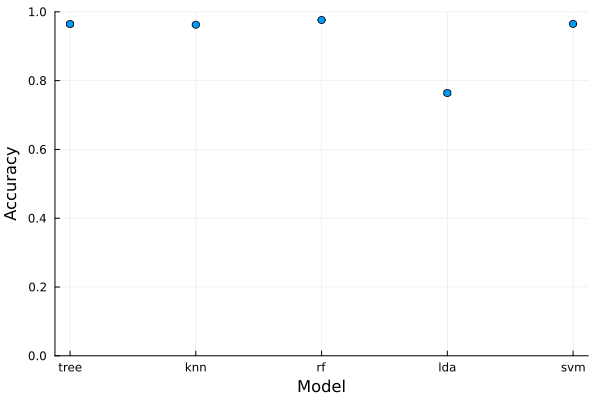

In [84]:
results= [eval_tree.measurement[1], eval_knn.measurement[1],eval_rf.measurement[1],eval_lda.measurement[1],eval_svm.measurement[1]];
errors=[std(eval_tree.per_fold[1]),std(eval_knn.per_fold[1]),std(eval_rf.per_fold[1]),std(eval_lda.per_fold[1]),std(eval_svm.per_fold[1])]
scatter(["tree", "knn", "rf", "lda", "svm"],results,yerror=errors,ylims=[0,1],label=nothing, xlab="Model", ylab="Accuracy")

Check accuracy of the test set

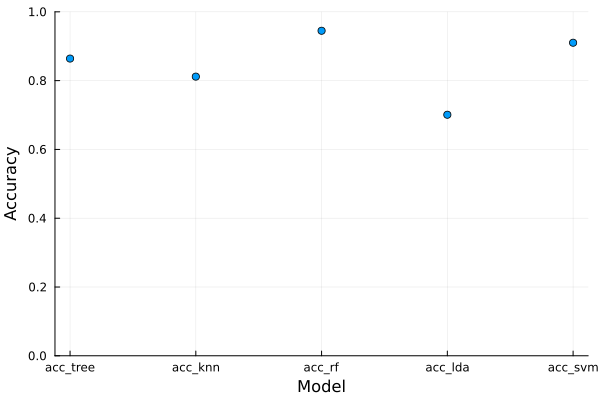

In [85]:
scatter(Array(string.(keys(test_results))),Array(float.(values(test_results))),ylims=[0,1],label=nothing, xlab="Model", ylab="Accuracy")